# Regressão Linear Simples

Neste notebook, será abordado um exemplo para a realização de um estudo entre a relação de variáveis utilizando Regressão Linear Simples e como podemos estruturas os dados para esta tarefa, realizar na prática, e compreender/analisar os resultados.

O caso que será estudado, envolverá duas variáveis aleátorias X e Y, que foram geradas artificialmente especificamente para a tarefa de Regressão Linear Simples, e além disso temos uma separação entre dados de treino e teste, para no final conseguir verificar se nosso modelo consegue predizer bem novos valores.

Inicialmente é interessante importar todas as bibliotecas que serão utilizadas para não termos problemas com importações no futuro

In [1]:
# Libs essenciais
import pandas as pd
import numpy as np

# Libs de visualização gráfica
import matplotlib.pyplot as plt
import seaborn as sns


# Imports do Sklearn para realizar a regressão
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

# Import do Scipy para realizar a regrssão
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.gofplots import ProbPlot

In [6]:
# Vamos importar o conjunto de dados
df = pd.read_csv('IncomeConsumption.csv',sep=';')

In [7]:
df.head()

,Consumption,Income
0,3011,9714
1,1305,3728
2,1879,6062
3,2654,8845
4,2849,8378


In [8]:
# Verificando o tamanho do conjunto de treino
df.shape

(50, 2)

Acima, pudemos verificar um pouco mais sobre o conjunto de dados, e entender como ele está disposto em termos de atributos e de tamanho. Ele só tem 2 atributos, pois neste caso estamos tratando de Regressão Simples, que visa compreender a relação entre duas variáveis e verificar se esta relação pode ser expressa linearmente.

# Pré-Processamento

In [9]:
# Verificando valores missing
df.isna().sum()

Consumption    0
Income         0
dtype: int64

Felizmente não temos valores missing, logo podemos ter mais tranquilidade para manipular o conjunto de dados.

In [10]:
# Verificando os tipos de dados
df.dtypes

Consumption    int64
Income         int64
dtype: object

Como tratamos de regressão, é interessante transformar estes valores para float, apenas para evitar qualquer tipo de limitação da tipagem de dados.

In [15]:
# Castando para float32
df = df.astype('float32')

In [24]:
# Dividindo o conjunto de dados em X e y
X = df.Consumption.values.reshape(-1,1)
y = df.Income.values.reshape(-1,1)

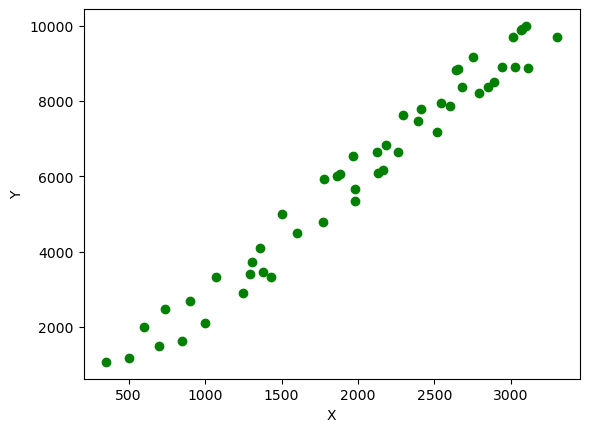

In [25]:
# Verificando a disposição dos dados
plt.scatter(X, y, color ='green')

plt.xlabel("X")
plt.ylabel("Y")
plt.show()

Podemos perceber que há uma linearidade crescente dos pontos, o que é bem interessante.

# Estimação da reta

Nessa lógica, iremos realizar a regressão de fato para o nosso conjunto de dados. Como o python é uma linguagem amplamente utiliza para discutir estátistica e realizar projetos, temos diversas bibliotecas que realizam a Regressão Linear. Neste notebook, iremos abordar o SkLearn e o Scipy.

## Sklearn

O Sklearn, embora seja uma biblioteca muito poderosa, para a regressão tem alguns problemas, como por exemplo, a ausência do teste de hipóteses. Entretanto as outras funções existem e podem facilmente ser analisadas

In [26]:
# Instanciando o modelo
regr = LinearRegression()

Acima, instanciamos o objeto do modelo, isso significa que agora REGR possui as propriedades da Classes da Regressão linear do Sklearn, isso significa que agora podemos utilizar a variável REGR para chamar as funções (métodos) da classe.

A primeira função que precisamos chamar é a .fit(X,y) . É importante notar que esta função recebe primeiro a variável independente e depois a variável dependente. Ao realizar a chamada desta função estamos criando a equação da regressão no formato $y = \beta_0 + \beta_1x + E$ 

Asssim, podemos chamar o método abaixo

In [27]:
regr.fit(X,y)

LinearRegression()

Ao realizarmos isso, temos os coeficientes $\beta_0$ e $\beta_1$. Para isso, o objeto REGR tem dois atributos que indicam isso: .coef_ que seria o coeficiente angular da reta, $\beta_1$ e o intercept_ que seria o coeficiente linear da reta, $\beta_0$.

In [28]:
#b0
regr.intercept_

array([-495.70654], dtype=float32)

In [29]:
regr.coef_

array([[3.262464]], dtype=float32)

Isso significa que nossa equação de regressão tem a seguinte forma:


$ y= -495.70 + 3.26*x$

# Calcular Métricas

In [32]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

In [33]:
# Calculando métricas

# Predições
pred = regr.predict(X)


r2 = r2_score(pred, y)
mse = mean_squared_error(pred, y)
mape = mean_absolute_percentage_error(pred, y)

print(f'\nMSE: {mse:.4f}')
print(f'R2: {r2:.4f}')
print(f'MAPE: {mape:.4f}')


MSE: 216184.4375
R2: 0.9690
MAPE: 0.0988


1. **Mean Squared Error (MSE)**

O Mean Squared Error (Erro quadrático médio) é uma medida que avalia o quão próximo as previsões de um modelo estão dos valores reais, calculando a média dos quadrados das diferenças entre eles. Quanto menor o MSE, melhor o ajuste do modelo aos dados. Varia de 0 ao infinito. Entretanto, depende da escala dos dados.

É dado pela fórmula:

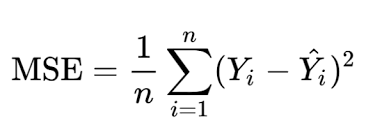


2. **R²**

O R² (R2, R-Squared) mede o quanto um modelo de regressão se ajusta aos dados. Varia de 0 a 1, em que 0 indica um ajuste fraco e 1 um ajuste forte.

É dado pela fórmula:

![image](https://miro.medium.com/v2/resize:fit:1400/1*_HbrAW-tMRBli6ASD5Bttw.png)

3. **Mean Percentage Absolute Error (MAPE)**

O Erro Percentual Absoluto Médio  é uma métrica que mede a precisão das previsões de um modelo em termos percentuais, calculando a média das diferenças percentuais absolutas entre previsões e valores reais. Quanto menor o MAPE, melhor a precisão das previsões. Ou seja, varia de 0 ao infinito.

É dado pela fórmula:

![image](https://miro.medium.com/v2/resize:fit:726/1*Txq63FvjzmdK-sDeCCDx1A.png)

# Suposições do modelo

1. Normalidade dos resíduos

O resíduo é  diferença entre o valor real e o valor estimado. Caso tenhámos um residuo negativo, isso significa que o valor estimado é bem mais alto. A ideia da regressão é minimizar a soma dos resíduos. A primeira suposição diz, que se plotamos os resíduos, eles devem se assemelhar a uma distribuição normal.


In [38]:
# Verificando a normalidade dos resíduos
residual = y - pred

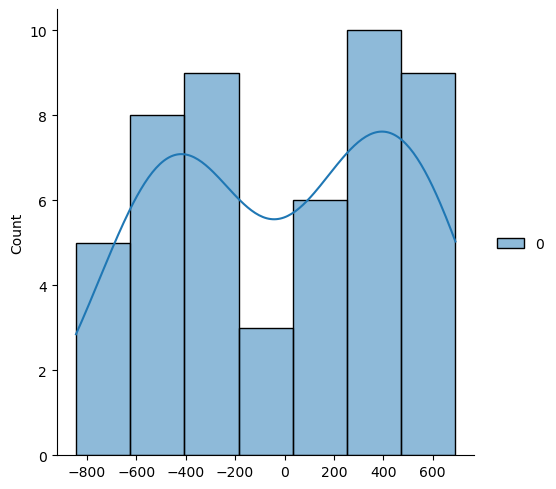

In [72]:
sns.displot(residual,kde='True')

In [45]:
import scipy as sp

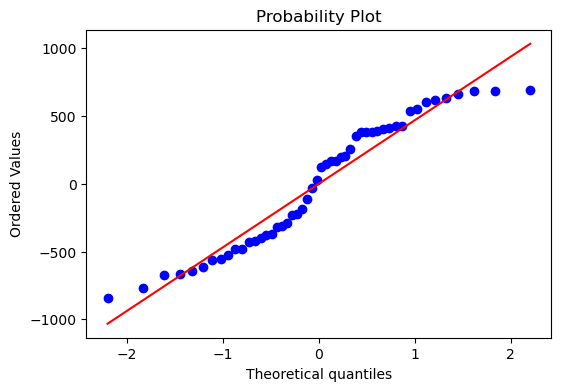

In [52]:
fig, ax = plt.subplots(figsize=(6,4))
sp.stats.probplot(residual.reshape(50,),plot=ax,fit=True)

plt.show()

Felizmente, os resíduos seguem a reta QQ, e desta maneira a primeira suposição é válida.

In [57]:
# Muito próximo a zero, bem interessante estar próximo de zero.
np.mean(residual)

-0.00012451172

2. Homocedasticidade

A variância dos resíduos precisa ser constante, ou seja, os resíduos devem ter uma distribuição constante ao longo do eixo X, caso contrário estariámos falando sobre Heterocedasticidade.

No eixo-X teremos os valores estimados de y, e no eixo-Y teremos os resíduos

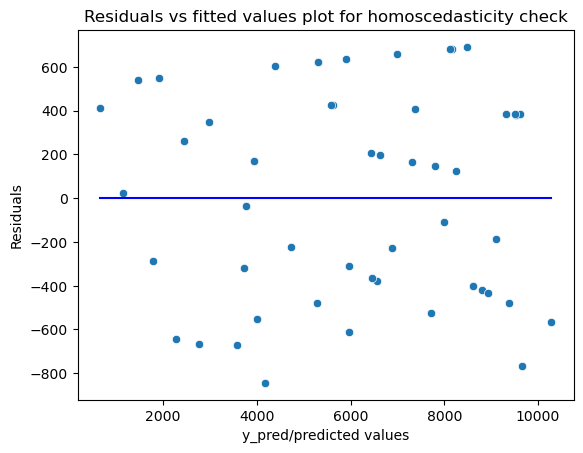

In [71]:
p = sns.scatterplot(x=pred.reshape(50,),y=residual.reshape(50,))
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')

p = sns.lineplot(x=[pred.min(),pred.max()],y=[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

Podemos perceber que os valores estão bem distribuídos ao longo da reta, e não tem nenhum comportamento estranho.

3. Independência dos erros

Os erros não devem ter relação entre si, e desta maneira, quando plotamos eles, não devem ter relação nenhuma

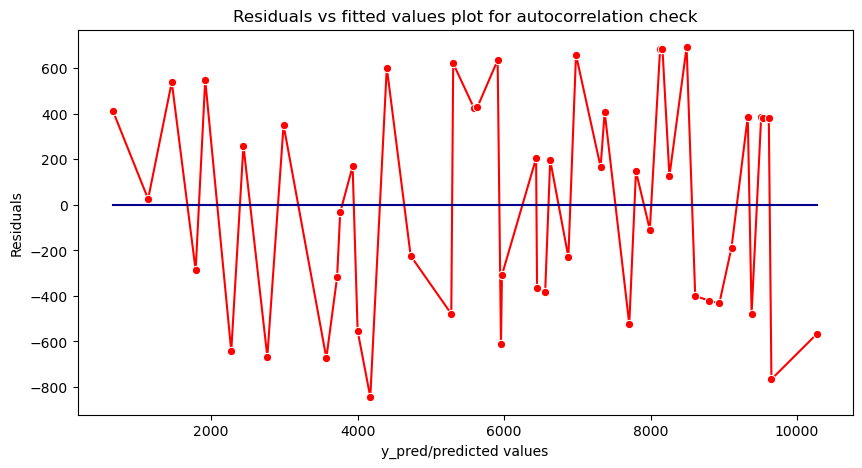

In [79]:
plt.figure(figsize=(10,5))
p = sns.lineplot(x=pred.reshape(50,),y=residual.reshape(50,),marker='o',color='red')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')

p = sns.lineplot(x=[pred.min(),pred.max()],y=[0,0],color='darkblue')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')

4. Verificar correlação


In [86]:
df.corr()

,Consumption,Income
Consumption,1.000000,0.984835
Income,0.984835,1.000000


Podemos perceber que estes atributos estão extremamante correlacionados.

# Teste de hipóteses

Agora iremos apresentar uma abordagem utilizando o Scipy para a realizar a Regressão Linear e o teste de Hipóteses para o nosso conjunto de dados.

O modelo do scipy já é um pouco diferente do Sklearn, pois possui algumas funcionalidade adicionais. A primeira diferença já está presente na instanciação do objeto, onde a variável dependente é inserida primeiro, seguido da variável independente. Nota-se que é necessário inserir este X com o sm.add_constant para que o modelo leva em conta o $\beta_0$, caso contrário seu valor será 0. 

In [80]:
# Instancia o modelo
modelo = sm.OLS(y, sm.add_constant(X))

Novamente iremos dar um .fit() para ajustar o modelo ao nosso conjunto de dados, mas desta vez, como já passamos os valores de entrada, não será necessário colocar o .fit() com os arrays.

In [81]:
modelo = modelo.fit(use_t=False)

Após isso, nosso modelo já contém a reta feita. Algo muito interessante que podemos realizar, é dar um .summary() no objeto 'modelo' para verificarmos todos os resultados da nossa regressão, inclusive o teste de hipóteses.

In [82]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     1547.
Date:                Tue, 22 Aug 2023   Prob (F-statistic):           3.56e-38
Time:                        17:39:02   Log-Likelihood:                -378.04
No. Observations:                  50   AIC:                             760.1
Df Residuals:                      48   BIC:                             763.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -495.7076    179.825     -2.757      0.006    -848.157    -143.258
x1             3.2625      0.083     39.328      0.000       3.100       3.425
==============================================================================
Omnibus:                       23.764   Durbin-Watson:                   2.539
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                3.978
Skew:                          -0.081   Prob(JB):                        0.137
Kurtosis:                       1.628   Cond. No.                     5.81e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.81e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Ambos os coeficientes passam no teste de hipótese para os níveis de significância de 10%, 5% e 1%, já que o valor da probabilidade é bicaudal.

A tabela gerada pelo scipy é muito grande e possui muitas informações, então, vamos analisá-la parte por parte para poder compreender melhor oque elas significam.

## Explicação

Primeiramente, OLS se refere ao método utilizado para encontrar os estimadores: Método dos quadrados mínimos.

**Dep Variable:** Representa qual a nossa variável dependente, neste caso é Y, é importante ressaltar que este nome é derivado do nome da variável que foi passado na instanciação do objeto.

**No. Observations:** Número de amostras no conjunto de dados

**Df Residual:** Grau de liberado do nosso teste de hipóteses realizado, como no nosso caso estamos lidando com duas variáveis será n-2. É importante ressaltar que caso tivessemos 4 atributos independente, o grau de liberadade seira n - 1 - 4.


**Df Model:** Número de variáveis que serão utilizadas para predizer Y, neste caso apenas uma.

**Covariance Type:** Covarancia é a medida de quão duas variáveis estão relacionadas, a uma covariancia robusta é uma que é calculada para elmiminar possíveis atributos que estejam relacionados, o que não é o nosso caso, por isso nonrobust

**R-Square:** R-2 score, que foi exibido acima


**Adj R-Square:** Um R2 ajustado para compreender a interferência de diverasas variáveis, como não temos não será abordado.

**F-Statistic:** Compara o modelo linear produzido contra um modelo que troca o efeito da variável para 0, ou seja, não utiliza, descobrindo se uma variável é estatiscamente significante. Para interpretar este resultado seria necessário escolher um valor de alpha como o nível de significância e visualizar os valores na F-Table.

**Prob (F-Statistic):** Esse número é utilizado para indicar se a hipótese nula deve ser aceita ou não.

**AIB e BIC:** Compara a eficiência do modelo no processo de regressão linear, usando um sistema de penalidade para medir múltiplas varíaveis, pode ser utilizada para a feture selection, mas neste caso não é relevante.

**coef:** Indica o valor do coeficiente, nota-se que é igual ao valor do Sklearn, indicando que ambos os métodos estão coerentes, já que utilizam a mesma técnica para encontrar os coeficientes, OLS.

**std err:** Uma estimativa do desvio padrão do coeficiente, uma medida de variação do coeficiente nos pontos.

**t:** t está relacionado com o teste t, representando o valor observado para uma medida especifica. Um baixo std_err comparado com um coeficiente alto irá produzir um valor de t muito grande, o que irá representar uma alta significância do coeficiente.


**P>|t|:** Utiliza a estátistica t para produzir o valor-p, uma medida utilizada no teste de hipóteses T. Como estudado, se aplicássemos um nivel de significância $\alpha$= 5% a hipótese nula em $\beta_0$ seria aceita, e este coeficiente poderia ser ajustado para 0. É importante ressaltar que este valor que aparece é o valor de P para o teste bilateral, evidenciado pelo módulo em t, logo precisamos apenas estabelecer um nível de significância espécifico para realziar o teste de maneira simples.


**[0.025 and 0.975]:** São os intervalos de confiança do nosso modelo, algo que não foi muito abordado, mas representa que existe aproximadamente 95% de chance que o nosso coeficiente esteja entre esses valores, tendo em vista que podemos ter um afastamento de até dois desvios padrões , tanto para mais quanto para menos. Caso o valor esteja fora desta intervalo, existe uma grande chance de ser um outlier.

Omnibus descreve a normalidade da distribuição dos nosso resíduos, ou seja, dos nossos erros, algo que é muito importante, pois os erros precisam seguir uma distribuição normal. Isso é calculado utilizando skew and kurtosis como medidas. Um valor de 0 iria indicar uma normalidade perfeita. 

Prob(Omnibus) é a probabilidade da normalidade indicada pelo atributo exibido acima. Um valor de 1 iria indicar perfeição

Skew é uma medida de simetria no nosso conjunto de dados, sendo 0, uma simetria perfeita

Kurtosis mede a concentração do nosso conjunto de dados ao redor de zero em uma curva normal, quanto maior o valor desta medida, menor a quantidade de outliers




Durbin-Watson é uma medida de Homoscedasticidade que assume que os resíduos tem variância constante. Uma heteroscedasticidade implicaria em uma variância inconstante na nossa distribuição, caso nosso modelo seja pouco ajustado ao conjunto de dados. Uma Homoscedasticidade ideal seria entre 1 e 2.

Jarque-Bera (JB) and Prob(JB) são métodos alternativos para Omnibus, e são utilizados para confirmar um ao outro, ele não necessariamente precisam ser iguais, mas precisam estar relativamente próximos.

 Condition number mede a sensibilidade do nosso modelo quando comparado ao tamanho de mudanças nos dados. Multicolinariedade é diretamente impactada por um alto Condition Number. Multicolinariedade é um termo utilizado para descrever que variáveis independentes estão fortemente relacionadas entre si, e estão impactando erroneamente a nossa variável dependente, devido a uma ambiguidade.

# Conclusão